In [130]:
# NB and CART
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [131]:
# Load data
df = pd.read_csv("kbopitchingdata.csv")

columns_to_keep = [
    'ERA', 'WHIP', 'strikeouts', 'complete_game', 'shutouts', 'saves',
    'innings_pitched', 'hits', 'runs', 'earned_runs', 'home_runs', 'walks', 'win_loss_percentage'
]

df = df[columns_to_keep]
df

,ERA,WHIP,strikeouts,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,win_loss_percentage
0,3.57,1.312,1062,0,18,32,1264.1,1117,557,501,79,542,0.558
1,3.67,1.316,1051,2,6,33,1255.0,1166,581,512,85,486,0.560
2,4.28,1.487,1037,2,10,27,1260.1,1288,653,599,104,586,0.519
3,4.29,1.450,1031,2,14,46,1250.0,1287,653,596,129,526,0.560
4,4.50,1.476,1046,3,10,33,1247.2,1256,686,624,122,585,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.19,1.260,318,32,4,10,725.1,625,318,257,41,289,0.700
319,3.51,1.298,394,19,8,15,708.1,660,350,276,52,259,0.582
320,3.95,1.435,363,26,4,4,713.2,763,385,313,69,261,0.388
321,3.76,1.403,348,24,2,3,707.9,698,388,296,50,295,0.475


In [132]:
# Replace "?" values with NaN so we can use dropna and drop NaN values
df.replace("?", np.nan, inplace = True)
df.dropna(inplace = True)

In [133]:
# X and Y axes
X = df.drop(columns = ['win_loss_percentage'])
Y = df['win_loss_percentage'].apply(lambda x: 1 if x >= 0.5 else 0)

In [134]:
# Initialize MinMaxScale and fit and transform the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [135]:
# Train and tests
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size = 0.3, random_state = 42)
Y_train.head()
Y_test.head()

173    0
132    0
197    1
9      0
104    1
Name: win_loss_percentage, dtype: int64

In [136]:
# Make Naïve Bayes model and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

# Predict the data
Y_pred = nb_model.predict(X_test)

Accuracy: 68.04123711340206


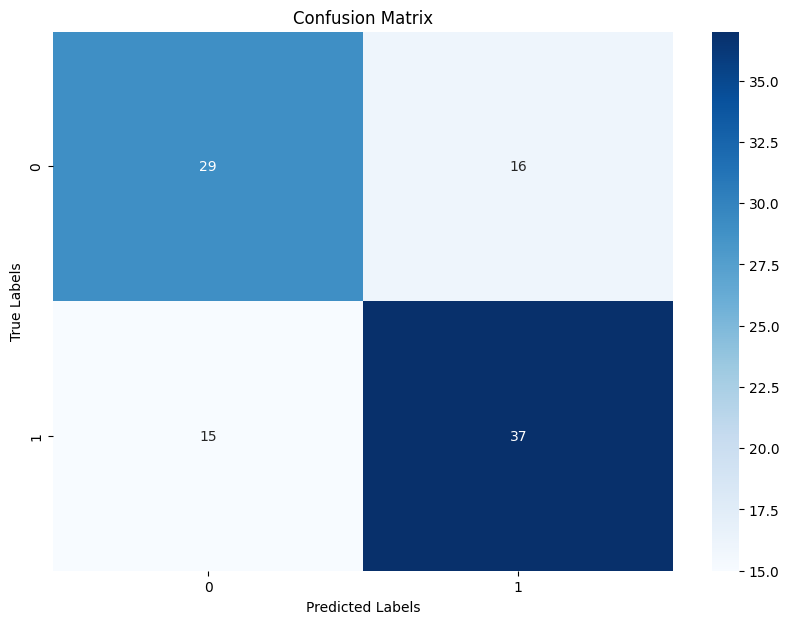

Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.64      0.65        45
           1       0.70      0.71      0.70        52

    accuracy                           0.68        97
   macro avg       0.68      0.68      0.68        97
weighted avg       0.68      0.68      0.68        97



In [137]:
# Calculate accuracy score, confusion matrix, and classification report
accuracy = accuracy_score(Y_test, Y_pred) * 100
print(f'Accuracy: {accuracy}')

confusion_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

classification_report = classification_report(Y_test, Y_pred)
print("Classification Report: ")
print(classification_report)
